In [148]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html






# My data set didn't work I tested it and the data time was't good since the price as always the same for monthly or per day for each listing_id

# Link for new data set https://data.nasdaq.com/databases/BCHAIN#quick-start-examples " bitcoin price overtime"

In [152]:
# Define Path
path = r"C:\Users\toloz\Achivement 6 data immersion\02 data\air bnb" 

In [154]:
df_bitcoin  = pd.read_csv(os.path.join(path, 'Bitcoin.csv'))

In [156]:
df_bitcoin

,code,date,value
0,TOTBC,2023-09-12,"19,483,681.25"
1,MKPRU,2023-09-12,"25,162.70"
2,ATRCT,2023-09-12,10.25
3,AVBLS,2023-09-12,1.61
4,BLCHS,2023-09-12,"510,255.59"
...,...,...,...
166196,TVTVR,2016-07-13,39.47
166197,TVTVR,2016-07-14,86.47
166198,TVTVR,2016-07-15,76.35
166199,TVTVR,2016-07-16,93.15


In [158]:
# Convert to float with 2 decimal places
df_bitcoin['value'] = df_bitcoin['value'].apply(lambda x: round(float(x), 2))

# Print the updated dataframe
print(df_bitcoin)


         code        date         value
0       TOTBC  2023-09-12 19,483,681.25
1       MKPRU  2023-09-12     25,162.70
2       ATRCT  2023-09-12         10.25
3       AVBLS  2023-09-12          1.61
4       BLCHS  2023-09-12    510,255.59
...       ...         ...           ...
166196  TVTVR  2016-07-13         39.47
166197  TVTVR  2016-07-14         86.47
166198  TVTVR  2016-07-15         76.35
166199  TVTVR  2016-07-16         93.15
166200  TVTVR  2016-07-17         60.58

[166201 rows x 3 columns]


In [160]:
# Format numbers with commas for better readability (2 decimal places)
df_bitcoin['value'] = df_bitcoin['value'].apply(lambda x: "{:,.2f}".format(x))

# Print the updated dataframe
print(df_bitcoin)


         code        date          value
0       TOTBC  2023-09-12  19,483,681.25
1       MKPRU  2023-09-12      25,162.70
2       ATRCT  2023-09-12          10.25
3       AVBLS  2023-09-12           1.61
4       BLCHS  2023-09-12     510,255.59
...       ...         ...            ...
166196  TVTVR  2016-07-13          39.47
166197  TVTVR  2016-07-14          86.47
166198  TVTVR  2016-07-15          76.35
166199  TVTVR  2016-07-16          93.15
166200  TVTVR  2016-07-17          60.58

[166201 rows x 3 columns]


In [162]:
# Set pandas to not use scientific notation when displaying
pd.set_option('display.float_format', '{:,.2f}'.format)

# Now print the DataFrame, it will display without scientific notation
print(df_bitcoin)


         code        date          value
0       TOTBC  2023-09-12  19,483,681.25
1       MKPRU  2023-09-12      25,162.70
2       ATRCT  2023-09-12          10.25
3       AVBLS  2023-09-12           1.61
4       BLCHS  2023-09-12     510,255.59
...       ...         ...            ...
166196  TVTVR  2016-07-13          39.47
166197  TVTVR  2016-07-14          86.47
166198  TVTVR  2016-07-15          76.35
166199  TVTVR  2016-07-16          93.15
166200  TVTVR  2016-07-17          60.58

[166201 rows x 3 columns]


# Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

In [165]:
df_bitcoin = df_bitcoin.drop('code', axis=1)


In [167]:
df_bitcoin.head()

,date,value
0,2023-09-12,"19,483,681.25"
1,2023-09-12,"25,162.70"
2,2023-09-12,10.25
3,2023-09-12,1.61
4,2023-09-12,"510,255.59"


In [169]:
df_bitcoin.columns

Index(['date', 'value'], dtype='object')

In [171]:
# Create a line chart of your data.

In [173]:
# Convert 'date' column to datetime if not already done
df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date'], errors='coerce')

# Check the data type and first few rows
print(df_bitcoin['date'].dtype)
print(df_bitcoin.head())


datetime64[ns]
        date          value
0 2023-09-12  19,483,681.25
1 2023-09-12      25,162.70
2 2023-09-12          10.25
3 2023-09-12           1.61
4 2023-09-12     510,255.59


In [175]:
# Filter for rows where 'date' is between 2019-01-01 and 2023-12-31
df_filtered = df_bitcoin[(df_bitcoin['date'] >= '2019-01-01') & (df_bitcoin['date'] <= '2022-12-30')]

# Double-check the filtered data
print(df_filtered.head())
print(df_filtered['date'].min(), df_filtered['date'].max())


            date value
14142 2019-01-02  7.67
14143 2019-01-05  4.37
14144 2019-01-08  6.50
14145 2019-01-11  7.17
14146 2019-01-14  6.57
2019-01-01 00:00:00 2022-12-30 00:00:00


In [177]:
# Group by year and month, calculate the average value
df_monthly_avg = df_filtered.groupby(df_filtered['date'].dt.to_period('M'))['value'].mean().reset_index()

# Double-check the data
print(df_monthly_avg.head())
print(df_monthly_avg['date'].min(), df_monthly_avg['date'].max())


TypeError: Could not convert 7.674.376.507.176.578.705.277.027.207.900.800.950.970.960.810.830.980.870.880.970.980.900.850.961.061.111.101.040.960.810.941.061.030.911.020.980.881.021.011.071.02198,101.22197,366.98197,516.74198,514.02197,792.17197,908.73198,906.03198,194.26198,339.26199,335.42198,636.23198,759.97199,757.46199,019.43199,160.01200,157.51199,447.27199,590.51200,587.78199,844.58199,986.06200,983.41201,120.55201,270.41201,417.66201,558.38201,705.49201,825.74201,974.54202,121.49202,268.5229.8427.1225.9925.2529.9026.9825.1727.0326.2323.0822.2322.5722.5520.7720.2219.8719.6620.7322.1424.3321.3319.7422.4423.8320.8523.6122.7920.5119.2318.2819.023.141.511.311.332.482.431.161.461.351.120.632.372.631.150.490.981.161.402.032.981.411.041.241.541.382.342.861.061.270.801.175,618,595,848,850.005,618,595,848,853.005,618,595,848,850.005,618,595,848,850.005,618,595,848,853.005,618,595,848,850.005,618,595,848,850.005,618,595,848,853.005,618,595,848,850.005,618,595,848,850.005,618,595,848,853.005,618,595,848,850.005,618,595,848,850.005,862,614,531,725.315,883,988,430,960.005,883,988,430,960.005,883,988,430,955.005,883,988,430,960.005,883,988,430,960.005,883,988,430,955.005,883,988,430,960.005,883,988,430,960.005,883,988,430,955.005,883,988,430,960.005,883,988,430,960.005,883,988,430,955.005,883,988,430,960.005,836,655,168,810.005,814,661,935,892.005,814,661,935,890.005,814,661,935,890.0059,597.64126,389.92152,925.79141,474.8082,676.4776,252.20153,800.86146,195.55157,273.14176,073.37297,947.5674,725.4965,602.40163,190.80348,323.10171,796.42138,693.18124,501.4482,949.7266,397.09138,085.58157,815.46151,170.08134,575.05128,463.1081,859.9563,071.67174,584.69147,946.66215,449.84167,866.06223,626,548.67488,767,286.23586,335,098.63540,805,337.78319,832,893.25295,057,199.36620,754,635.68590,024,024.06630,379,615.78671,294,824.371,089,515,520.38270,915,665.31236,158,267.23588,158,821.961,270,645,847.43622,121,356.12502,064,338.99449,808,595.92306,127,868.44240,365,948.24488,189,514.45560,917,561.01538,919,234.42477,934,358.14456,544,872.15292,643,247.16223,512,708.83598,393,585.44502,734,964.42737,418,316.86574,609,830.7241,615,985.2742,174,589.1043,291,796.7641,615,985.2745,526,212.0839,381,569.9639,381,569.9647,202,023.5745,805,513.9943,571,098.6841,336,683.3638,543,664.2138,264,362.3043,423,390.2238,609,293.9838,901,788.6437,146,820.7340,364,261.8938,901,788.6445,921,660.2743,874,197.7138,024,304.6842,704,219.1047,384,133.5340,364,261.8943,874,197.7140,071,767.2442,070,546.8242,201,068.2539,310,584.1244,802,503.967,012,103.657,368,988.367,564,081.647,115,351.227,929,513.796,974,865.187,286,414.828,610,282.088,367,487.857,609,635.026,853,670.726,352,381.996,266,417.926,784,730.486,111,232.226,073,704.515,831,717.376,341,863.736,354,782.867,156,712.116,723,982.965,844,342.946,683,461.537,364,947.576,309,969.926,857,448.836,393,436.206,318,406.836,364,552.335,884,537.256,731,427.323,752.273,855.883,865.803,822.633,856.623,920.464,036.094,032.254,034.143,812.593,646.253,646.353,599.843,531.963,656.783,621.273,621.433,632.393,690.523,703.983,548.433,540.023,587.353,566.403,586.253,577.793,576.303,554.503,448.583,421.603,470.0065,505,657,848.0067,518,253,391.6066,916,312,312.5066,755,628,485.2067,564,391,445.9066,369,897,500.0070,505,909,026.0070,510,271,360.4070,304,762,700.0066,624,794,465.5063,908,086,521.2063,615,916,000.0062,926,132,293.8063,007,587,598.2064,099,311,262.5063,319,459,560.9063,302,358,632.1063,044,059,750.0064,548,729,309.3063,324,582,526.2061,935,692,493.7562,669,239,200.0062,090,544,093.8062,191,490,425.0061,980,057,112.5062,206,594,925.0062,158,701,437.5060,092,219,718.8059,468,172,181.2060,243,499,050.0059,804,077,625.0035,743.0050,735.0054,495.0056,309.0050,060.0046,766.0060,430.0060,454.0060,639.0060,527.0060,044.0052,340.0044,069.0060,436.0063,298.0062,933.0060,874.0061,015.0049,592.0045,754.0060,748.0060,355.0059,887.0061,803.0058,662.0051,449.0046,047.0060,813.0063,158.0060,748.0064,184.0031,920,413.0031,955,907.0031,969,197.0031,983,139.0032,124,379.0032,136,516.0032,178,353.0032,188,996.0032,218,090.0032,237,325.0032,262,119.0032,299,973.0032,311,110.0032,350,802.0032,361,063.0032,418,226.0032,466,144.0032,476,244.0032,512,090.0032,527,239.0032,551,555.0032,579,944.0032,594,221.0032,640,825.0032,657,809.0032,688,146.0032,704,263.0032,728,557.0032,778,119.0032,808,338.0032,865,601.006,621.0014,734.2916,864.5814,285.9912,490.9912,106.4020,973.0119,466.0918,471.5717,840.8523,199.2511,902.0910,143.3919,086.0021,066.3820,300.5918,357.9319,596.7010,003.638,483.8717,515.5529,007.1920,452.6218,418.2717,629.879,977.037,240.9617,040.6219,186.0119,425.4721,314.24310,119.00415,821.00450,626.00454,701.00385,488.00389,294.00448,075.00465,084.00463,346.00489,565.00486,649.00396,628.00372,206.00455,376.00466,212.00493,981.00462,878.00484,530.00400,052.00379,373.00449,404.00450,118.00482,794.00470,446.00492,261.00444,594.00383,276.00481,279.00480,702.00462,721.00487,936.00234,725.00271,696.00291,016.00281,772.00265,192.00258,522.00284,782.00318,524.00319,056.00327,338.00308,372.00281,502.00276,997.00326,685.00302,279.00305,702.00296,695.00305,965.00282,188.00294,118.00315,202.00296,040.00293,494.00308,146.00301,085.00288,285.00276,651.00308,062.00326,162.00321,980.00353,945.00369,240,247.00369,717,721.00370,008,737.00370,039,173.00370,555,701.00370,814,223.00370,844,663.00371,417,529.00371,736,585.00371,764,711.00372,372,295.00372,653,797.00372,685,575.00373,257,479.00373,559,758.00373,591,457.00374,162,155.00374,468,120.00374,498,314.00375,044,426.00375,359,628.00375,390,878.00375,685,513.00375,980,457.00376,287,875.00376,588,234.00376,876,738.00377,152,636.00377,461,664.00377,787,483.00378,109,678.001,575.341,799.311,877.521,891.091,626.941,833.492,019.731,884.761,945.462,098.322,083.592,039.872,021.882,192.522,289.992,298.512,336.182,217.142,121.711,873.362,101.352,277.232,010.231,902.142,181.781,921.902,019.352,124.572,233.992,367.502,283.52227,739.00261,327.00280,535.00271,427.00256,504.00250,546.00274,098.00307,496.00308,372.00314,279.00297,061.00273,350.00269,419.00315,866.00290,582.00294,849.00285,474.00295,569.00273,684.00283,169.00302,159.00282,790.00280,641.00296,838.00289,980.00278,678.00267,466.00294,258.00313,669.00309,716.00339,704.0017,457,600.0017,459,487.5017,460,225.0017,463,287.5017,465,325.0017,465,762.5017,468,850.0017,470,962.5017,471,362.5017,474,962.5017,476,812.5017,476,900.0017,480,250.0017,482,112.5017,482,425.0017,485,425.0017,487,012.5017,487,950.0017,490,400.0017,492,362.5017,493,487.5017,495,600.0017,497,687.5017,499,012.5017,501,075.0017,503,262.5017,504,562.5017,506,837.5017,508,662.5017,510,100.0017,512,175.00549,766.65985,716.74940,397.96972,455.82762,435.10691,139.04984,689.40907,272.32945,619.491,165,194.941,202,241.87801,972.74746,729.86943,758.901,387,794.75999,523.60865,081.66890,215.48635,759.82673,875.571,554,582.031,169,130.351,177,961.571,481,541.931,829,467.28956,749.61735,257.961,640,413.971,566,152.822,244,734.922,180,298.4311.2318.0419.1719.5812.2716.6023.8820.9524.1725.8524.2617.1214.1819.9921.2025.0823.4920.9217.5814.4219.9220.9022.6722.9924.8219.8815.9124.1623.1521.2229.0441,541.1569,764.7574,098.9874,019.9747,470.5065,060.3196,377.3284,538.3997,504.2699,192.1188,709.4362,435.4350,842.9272,061.6477,536.9790,360.7685,024.2675,982.3666,289.1152,211.8970,681.3974,224.1981,449.0381,822.5788,476.1775,230.0856,617.4582,838.0880,214.8372,651.8199,308.57255,956,548.18241,928,399.19252,710,143.66203,230,963.08293,647,134.82182,621,668.13278,935,705.87314,915,700.81340,650,855.44413,021,289.12465,176,834.07245,745,577.75165,382,202.23170,721,560.27266,949,739.43268,546,359.52237,255,849.81206,239,337.20208,367,429.89205,575,557.01217,211,992.53200,754,428.00209,940,367.51204,197,869.73151,516,265.22184,223,340.89157,218,439.56162,815,294.30219,370,864.05125,314,902.44160,951,786.00 to numeric

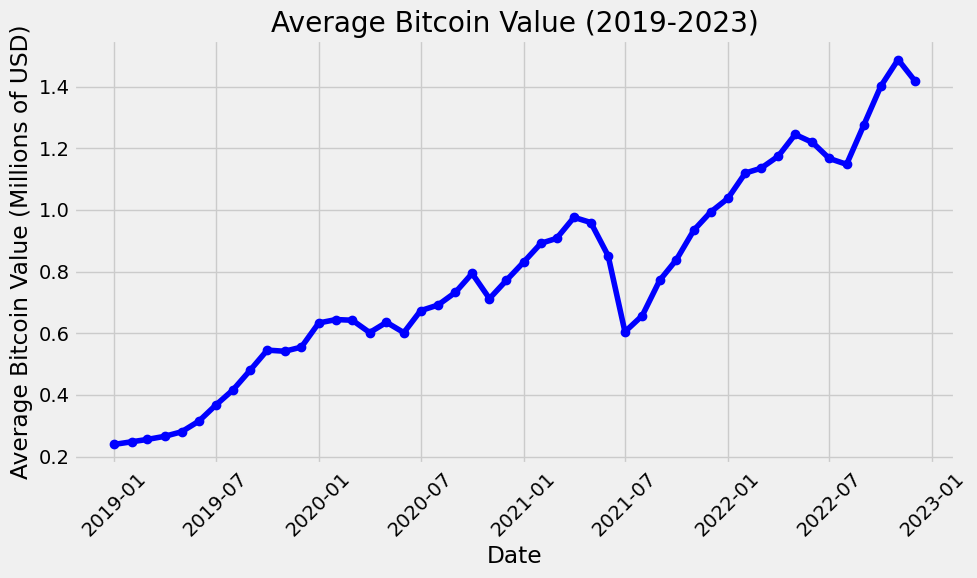

In [202]:
# Scale the values by 1 million to display in millions of USD
df_monthly_avg['value'] = df_monthly_avg['value'] / 1_000_000

# Plot the chart again with scaled values
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_avg['date'].dt.to_timestamp(), df_monthly_avg['value'], marker='o', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Bitcoin Value (Millions of USD)')  # Update the label to reflect scaling
plt.title('Average Bitcoin Value (2019-2023)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


## Overall Trend: Bitcoin's value generally increased from 2019 to 2023, showing strong growth.Drop in 2021: In 2021, there was a sharp decline in Bitcoin’s price. 

# Conduct a Dickey-Fuller test to check for stationarity.Interpret the results in a markdown cell and reference your null hypothesis.

In [182]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def dickey_fuller(timeseries):
    """Perform the Dickey-Fuller test and print results"""
    print('Dickey-Fuller Stationarity test:')
    # Perform the Dickey-Fuller test with autolag set to AIC (default behavior)
    test = adfuller(timeseries, autolag='AIC')
    
    # Create a pandas Series for the results to format it nicely
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    
    # Add critical values to the result
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    
    # Print the results
    print(result)

# Apply the test on the 'value' column of df_monthly_avg
dickey_fuller(df_monthly_avg['value'])


Dickey-Fuller Stationarity test:
Test Statistic                -0.84
p-value                        0.81
Number of Lags Used            1.00
Number of Observations Used   46.00
Critical Value (1%)           -3.58
Critical Value (5%)           -2.93
Critical Value (10%)          -2.60
dtype: float64


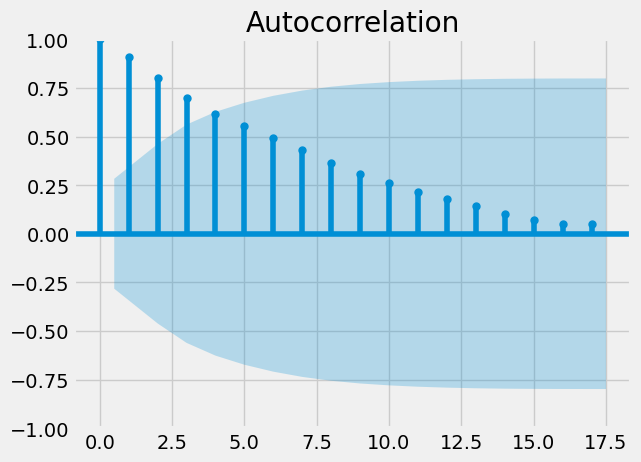

In [184]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Ensure 'df_monthly_avg' has a DatetimeIndex (if it is a PeriodIndex)
if isinstance(df_monthly_avg.index, pd.PeriodIndex):
    # Convert PeriodIndex to DatetimeIndex
    df_monthly_avg.index = df_monthly_avg.index.to_timestamp()

# Now you can plot the ACF
plot_acf(df_monthly_avg['value'])  # Use the correct column name if it's different
plt.show()


In [188]:
data_diff = df_monthly_avg - df_monthly_avg.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [190]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [192]:
data_diff.head()

,date,value,value_diff
2,<MonthEnd>,"7,626.82",-805.18
3,<MonthEnd>,"10,151.05","2,524.23"
4,<MonthEnd>,"14,576.56","4,425.50"
5,<MonthEnd>,"34,664.60","20,088.04"
6,<MonthEnd>,"51,766.56","17,101.96"


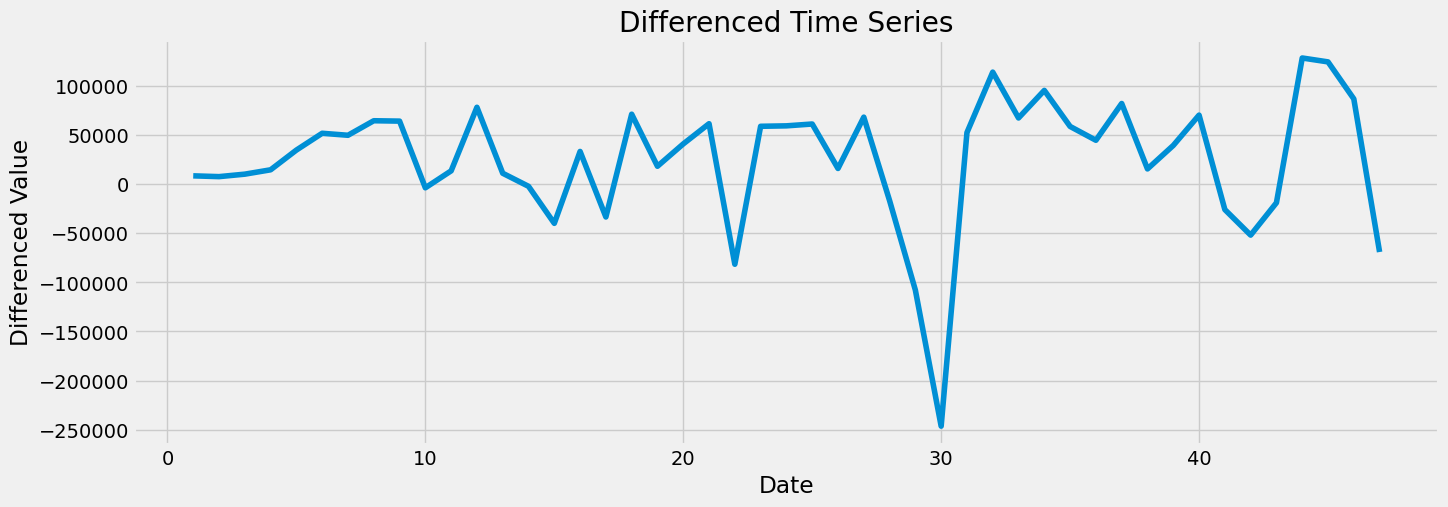

In [196]:
# Ensure the index is a datetime type (if it is not already)
data_diff = df_monthly_avg['value'].diff()  # or 'value_diff' if that's what you named your column

# Drop NaN values from differenced series (which appear due to differencing)
data_diff.dropna(inplace=True)

# Plotting the differenced series
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data_diff)
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.grid(True)
plt.show()


# Check your data’s autocorrelations.

### The autocorrelation function (ACF) plot of the differenced data shows predominantly negative values across multiple lags, indicating that the time series exhibits alternating high and low values over time. This suggests the presence of mean reversion or oscillatory behavior, where increases in value tend to be followed by decreases, and vice versa. Such negative autocorrelations are common in volatile time series data, like financial prices, and may indicate a pattern of reversion to the mean or alternating trends. This behavior could be modeled using autoregressive (AR) or moving average (MA) models in time series forecasting.